Methodology: 
This project focuses on applying K-Means clustering to the Iris dataset to uncover natural groupings in the data, without using the actual species labels.

1. Data Preparation
We used the Iris dataset, which includes 150 samples with four features: sepal length, sepal width, petal length, and petal width. The dataset was loaded using Python libraries. In order to improve clustering performance, feature scaling was applied where necessary.

2. Manual Implementation of K-Means
To better understand how K-Means works, we implemented the algorithm manually. The steps included:

Initialization: Randomly selecting initial cluster centroids from the data.

Assignment: Assigning each data point to the closest centroid using Euclidean distance.

Update: Calculating new centroids by averaging the points assigned to each cluster.

Iteration: Repeating the assignment and update steps until centroids stop changing or a maximum number of iterations is reached.

This iterative approach groups the data into clusters in a way that minimizes the sum of squared distances between points and their assigned centroids (known as inertia).

3. Cluster Evaluation
To evaluate the quality of the clusters without using labels, we used:

Inertia: Measures how compact the clusters are. Lower values indicate tighter clusters.

Silhouette Score: Measures how distinct each cluster is from the others. Values closer to 1 suggest clearer separation.

4. Dimensionality Reduction with PCA
Since the data has four features, we applied Principal Component Analysis (PCA) to reduce the feature space to two dimensions. This allowed us to create 2D scatter plots to visualize the clusters more effectively.

5. Comparison with scikit-learn's KMeans
To validate our manual implementation, we compared its results with scikit-learn’s built-in KMeans function. We also compared the generated clusters with the actual species labels using:

Purity: Shows how many samples in each cluster belong to the most common true class.

Rand Index: Measures similarity between the predicted clusters and the actual classes.

Step 1: Set Up Your Environment


In [2]:
# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


Step 2: Load and Explore the Iris Dataset

We are working with: 150 samples, 4 features (petal & sepal width/length), no labels used in clustering.

In [3]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Step 3: Preprocess – Standardize the Data

K-Means is distance-based, so we scale the data first.

In [4]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


Step 4: Choose Number of Clusters Using Elbow Method
We looked for the "elbow" point — where inertia starts to level off.

  k=3 

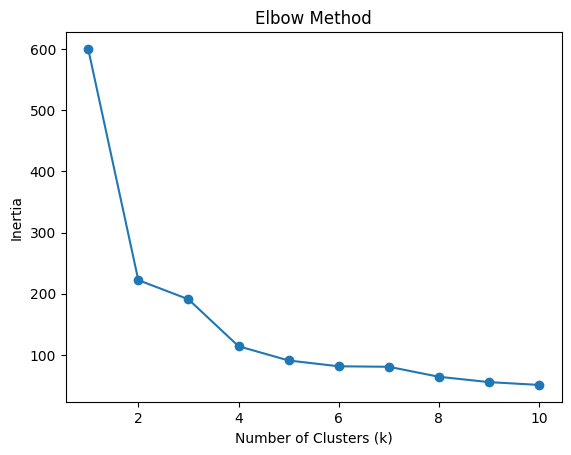

In [5]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


Step 5: Fit KMeans with Best K

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(scaled_data)
df['cluster'] = labels


Step 6: Evaluate with Silhouette Score
Value between -1 and 1. Closer to 1 = better separation.

In [7]:
score = silhouette_score(scaled_data, labels)
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.48


Step 7: Visualize Clusters with PCA (2D)

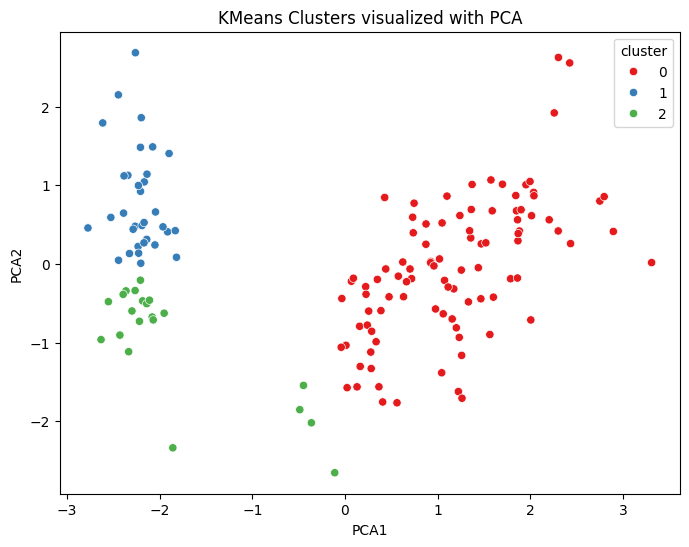

In [8]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='cluster', palette='Set1')
plt.title('KMeans Clusters visualized with PCA')
plt.show()


Compare with Actual Labels

In [9]:
df['actual'] = iris.target
pd.crosstab(df['cluster'], df['actual'])


actual,0,1,2
cluster,,,
0,0,46,50
1,33,0,0
2,17,4,0
